In [1]:
## reference: https://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html
import matplotlib as plt
import pandas as pd
import numpy as np

Location = r'C:\Users\sunny\documents\test.xlsx'
xl = pd.ExcelFile(Location)
xl.sheet_names
## [u'Sheet1'] ## write [u'Sheet2',u'sheet3'] in case of more sheet
## df = xl.parse("Sheet1")
## df.head()

['Sheet1']

In [2]:
ff = xl.parse("Sheet1")
ff.head()

,Start Time,End Time,Number of Failures,Number of Suspension,Entry
0,0.00,1.15,2,4,55
1,1.15,2.31,0,5,0
2,2.31,3.46,2,2,0
3,3.46,4.62,3,5,0
4,4.62,5.77,2,1,0


In [3]:
Entry=ff["Entry"]
f=ff["Number of Failures"]
s=ff["Number of Suspension"]
n=[]


for i in range(0,len(Entry)):
    if i==0:
        n.append(Entry[0])
    else:
        n.append(Entry[0]-sum(f[0:i])-sum(s[0:i]))

In [4]:
n_prime=n-s/2

In [5]:
R=[]
for i in range(0,len(Entry)):
    if i==0:
        R.append(1-f[0]/n_prime[0])
    else:
        R.append((1-f[i]/n_prime[i])*R[i-1])

In [6]:
var_coeff=[]

for i in range(0,len(Entry)):
    if i==0:
        var_coeff.append(f[0]/(n[0]*n[0]*(1-f[0]/n[0])))
    else:
        var_coeff.append(sum(var_coeff[0:i])+(f[i]/n[i]/n[i]/(1-f[i]/n[i])))



In [187]:
R_square=[]
for i in range(0,len(Entry)):
    R_square.append(R[i]**2)


In [8]:
Var=[]
for i in range(0,len(Entry)):
    Var.append(R_square[i]*var_coeff[i])
    

In [9]:
Var = np.asarray(Var)
R=np.asarray(R)
S_error=Var**0.5
S_error=np.asarray(S_error)

In [216]:
import scipy
## confidence
confidence=.99 ## https://stackoverflow.com/questions/20864847/probability-to-z-score-and-vice-versa-in-python
alpha=1-confidence
z=st.norm.ppf(1-alpha/2)
z

2.5758293035489004

In [217]:
from math import exp
w=[]
for i in range(0,len(Entry)):
    w.append(exp(z*(S_error[i]/(R[i]*(1-R[i])))))
w

[5.977267925656531,
 5.977267925656531,
 4.6972156540978665,
 3.5401585991931106,
 3.7947561022153558,
 5.112391371738469,
 6.576477234643286,
 7.677881610295768,
 9.410615672902864,
 17.57267227408037,
 29.46223715262005,
 78.20864109076307,
 225.7331637853401]

In [218]:
LCB=[]
UCB=[]
for i in range(0,len(Entry)):
    LCB.append(R[i]/(R[i]+(1-R[i])*w[i]))
    UCB.append(R[i]/(R[i]+(1-R[i])/w[i]))

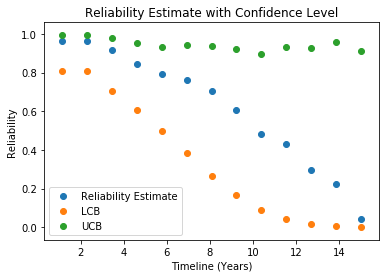

In [219]:
## https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
import matplotlib.pyplot as plt

plt.scatter(ff["End Time"],R, label = "Reliability Estimate") ### for plotting line plt.plot; for scatter plt.scatter
  
plt.scatter(ff["End Time"] ,LCB, label = "LCB") 

plt.scatter(ff["End Time"] , UCB, label = "UCB") 
  
# naming the x axis 
plt.xlabel('Timeline (Years)') 
# naming the y axis 
plt.ylabel('Reliability') 
# giving a title to my graph 
plt.title('Reliability Estimate with Confidence Level') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 